In [4]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

In [5]:
class Teleport(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(me->x[0] > system->xhi){
            me->x[0] = system->xlo + 0.55;
        }
        me->x[2] = 0;
        me->rho = 250.0;
        """

In [6]:
class HardFloor(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(me->x[1] < 0.4){
            me->x[1] = 0.5;
            me->v[1] = 0.0;
        }
        """

In [7]:
class HardWall(spatialpy.BoundaryCondition):
    def expression(self):
        return """
        if(me->x[0] < 1){
            me->x[0] = system->xlo + 0.5;
            me->v[1] = 0.0;
        }
        """

In [8]:
class weir(spatialpy.Model):
    def __init__(self, model_name="weir_aka_backward_facing_step"):
        spatialpy.Model.__init__(self, model_name)

        xmax = 50.1
        ymax = 10.1

        # Construct mesh for backward facing step
        self.mesh = spatialpy.Mesh(0, xlim=(0,xmax), ylim=(0,ymax), zlim=(0,0), gravity=[0,-1,0])
        for x in numpy.arange(start=0, stop=xmax, step=0.2):
            for y in numpy.arange(start=0, stop=ymax, step=0.2):
                # Top and bottom
                if y == 0 or y == 10:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)
                # Water
                elif y > 1.5 and y < 8 and x > 1.5 and x < 8:
                    self.mesh.add_point([x,y,0], type=2, mass=10.0, vol=1.0, nu=1.0, fixed=False)
                # Step
                elif x >= 10 and x <= 15 and y > 0 and y < 5:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)
                # Walls 
                elif x == 0 or x == 50:
                    self.mesh.add_point([x,y,0], type=1, mass=10.0, vol=1.0, nu=1.0, fixed=True)


        # Teleport particles back to start to simulate flow
        self.add_boundary_condition(Teleport())
        self.add_boundary_condition(HardFloor())
        #self.add_boundary_condition(HardWall())
        # Velocity
        #self.add_boundary_condition(spatialpy.BoundaryCondition(
        #    type_id=2,
        #    property = 'v',
        #   value    = [0.005, 0.0, 0.0] 
        #))

        self.staticDomain = False

        # Define time parameters
        self.timestep_size = 1e-3  # timestep size
        #self.num_timesteps = 50000    # number of timesteps
        self.num_timesteps = 300000    # number of timesteps
        self.output_freq = 300      # frequency of outputting results

In [9]:
model = weir()

In [10]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
sol.compile()

In [11]:
%time result = sol.run()

CPU times: user 468 ms, sys: 203 ms, total: 672 ms
Wall time: 4h 38min 37s


In [13]:
END_FRAME = 1000
START_FRAME = 500
N_FRAMES = END_FRAME - START_FRAME
t_ind = [item for item in range(START_FRAME, END_FRAME)]
ims = [result.read_step(i) for i in t_ind]
d = ims[0][1]['type']

In [35]:
def get_min_max_xv(result, t_ind):
    max_xv = 0
    min_xv = 100
    for i in t_ind:
        all_points, all_data = result.read_step(i)
        max_xv = max(max_xv, max(all_data['v'][:,0]))
        min_xv = min(min_xv, min(all_data['v'][:,0]))
#         print('max this timestep: ', max(all_data['v'][:,0]))
#         print('cumulative max: ', max_xv)
    return min_xv, max_xv

In [31]:
def mpl_plot_property(t_ndx=0):
        import matplotlib.pyplot as plt
        
        points, data = result.read_step(t_ndx)

        d = data["type"]

        plt.figure(figsize=(6.4, 4.8))
        plt.scatter(points[:,0],points[:,1], c=d)
        plt.axis('scaled')
        #plt.colorbar()
        #plt.title("title")
        plt.grid(linestyle='', linewidth=1)
        plt.plot()
        return

In [36]:
min_xv, max_xv = get_min_max_xv(result, t_ind)
print(min_xv)
print(max_xv)
print(t_ind)

-4.604859
3.868826
[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 

In [17]:
timespan = []
for i,t in enumerate(result.get_timespan()):
    timespan.append(i)
print(len(timespan))

1001


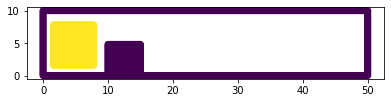

In [18]:
mpl_plot_property(0)

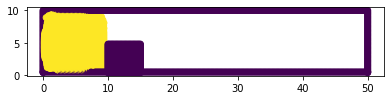

In [19]:
mpl_plot_property(1)

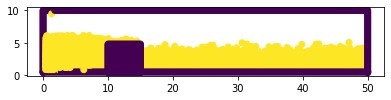

In [27]:
mpl_plot_property(1000)

In [21]:
ims = [result.read_step(i) for i in t_ind]
# d = ims[0][1]['type']
e = ims[0][1]['v'][:, 0]
d = [0.5]*2098

In [22]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import Video

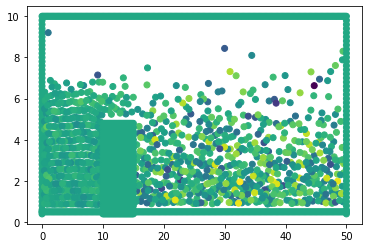

In [28]:
f = plt.figure()

ax1 = plt.subplot()

scat = ax1.scatter(ims[0][0][:,0], ims[0][0][:,1], c=e)

In [56]:
def animationUpdate(t, min_xv, max_xv):
    x = ims[t][0][:,0]
    y = ims[t][0][:,1]
    velocities = ims[t][1]['v'][:, 0]
    colors = []
    for i, v in enumerate(velocities):
        if ims[t][1]['type'][i] == 1:
            colors.append('grey')
        else:
            n_val = (v-min_xv) / (max_xv-min_xv)
            colors.append([(1.0-n_val)*0.8, (1.0-n_val), 1.0, n_val])
    scat.set_color(colors)
    scat.set_offsets(numpy.c_[x,y])
    return scat,

animation_func = lambda t: animationUpdate(t, min_xv, max_xv)

In [57]:
anim = FuncAnimation(f, animation_func, frames=N_FRAMES)

In [66]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=40, bitrate=1800)
anim.save('scatterPlotAnimation_pre-start_40fps.mp4', writer=writer)

In [67]:
Video('scatterPlotAnimation_pre-start_40fps.mp4')

In [ ]:
# result.plot_property("v", colormap="Blues", title="Weir",
#                       animated=True, t_ndx_list=timespan, speed=1, f_duration=1/60, t_duration=1/60)